In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
import pandas as pd

## 1. Logistic regression

**Question** What is logistic regression? Does it really solve the regression problems?

Logistic regression is based on logit function which is a defined as log(odds), where odds is the share of the probability of "one" (p) and the probability of "zero" (1-p):

$$odds(p) = \frac{p}{1-p}$$ <br/>
$$logit(p) = ln(odds(p)) = ln(\frac{p}{1-p})$$

**Example** We take at random one card from full deck of cards. We define success as taking a heart card. What are the values of probability of success, odds and logit in this example? <br/>

**Task** Generate in python two plots visualising the relation between: 
* probability and odds
* probability and logit

What is the value range for thise 3 functions (probability, odds and logit)?

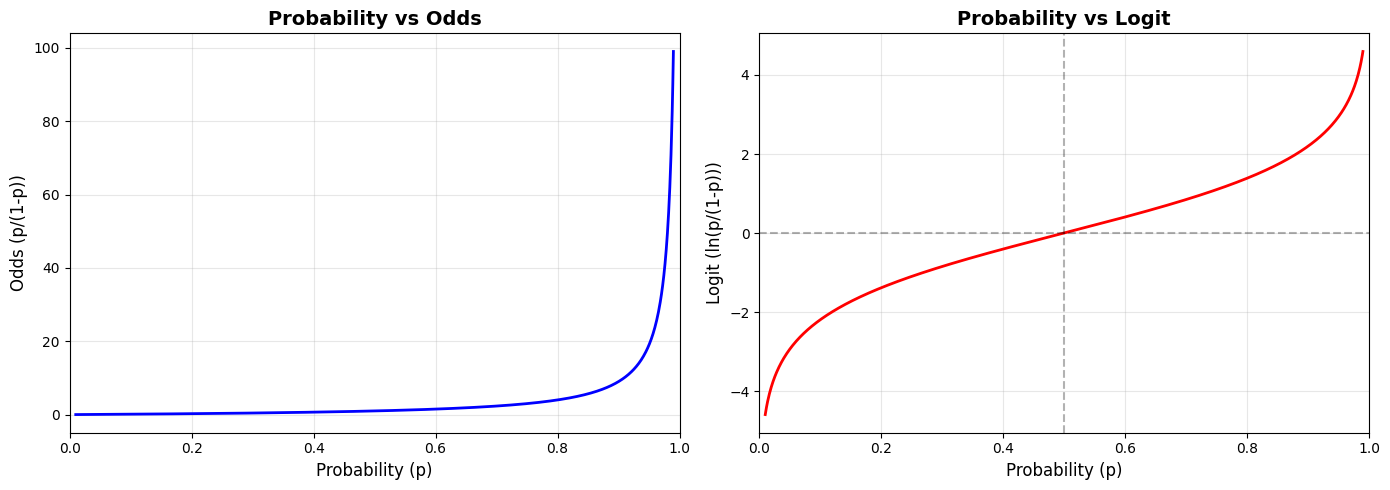

Probability (p): [0, 1]
Odds (p/(1-p)): [0, +∞)
Logit (ln(p/(1-p))): (-∞, +∞)

Cards Example:
Probability: 0.2500 (13/52)
Odds: 0.3333 (13:39 or 1:3)
Logit: -1.0986


In [5]:
p = np.linspace(0.01, 0.99, 1000)

odds = p / (1 - p)
logit = np.log(odds)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# probability vs odds
ax1.plot(p, odds, 'b-', linewidth=2)
ax1.set_xlabel('Probability (p)', fontsize=12)
ax1.set_ylabel('Odds (p/(1-p))', fontsize=12)
ax1.set_title('Probability vs Odds', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xlim([0, 1])

# probability vs logit
ax2.plot(p, logit, 'r-', linewidth=2)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax2.axvline(x=0.5, color='k', linestyle='--', alpha=0.3)
ax2.set_xlabel('Probability (p)', fontsize=12)
ax2.set_ylabel('Logit (ln(p/(1-p)))', fontsize=12)
ax2.set_title('Probability vs Logit', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xlim([0, 1])

plt.tight_layout()
plt.show()

print(f"Probability (p): [0, 1]")
print(f"Odds (p/(1-p)): [0, +∞)")
print(f"Logit (ln(p/(1-p))): (-∞, +∞)")
print("\nCards Example:")
print(f"Probability: {13/52:.4f} (13/52)")
print(f"Odds: {(13/52)/(1-13/52):.4f} (13:39 or 1:3)")
print(f"Logit: {np.log((13/52)/(1-13/52)):.4f}")


## 2. Simple logistic regression
Let's start with simple logistic regression - with only one independent variable. We will work on the example from english Wikipedia (https://en.wikipedia.org/wiki/Logistic_regression). We want to build a logistic regression model for estimating probability of passing an exam based on the time spent on studying:


|Hours|	0.50|0.75|1.00|1.25|1.50|1.75|1.75|2.00|2.25|2.50|2.75|3.00|3.25|3.50|4.00|4.25|4.50|4.75|5.00|5.50|
|-----|-----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
|Pass |0    |0   |0   |0   |0   |0   |1   |0   |1   |0   |1   |0   |1   |0   |1   |1   |1   |1   |1   |1   |

1 - student passed, 0 - student failed

In [7]:
hours = [0.5, 0.75, 1, 1.25, 1.5, 1.75, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 4, 4.25, 4.5, 4.75, 5, 5.5]
hours = np.array(hours).reshape(-1, 1)
passed = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]

Let's use the scatter plot to visualize our data. Can you intuitively find a threshold - after how long studying students usually pass the test?

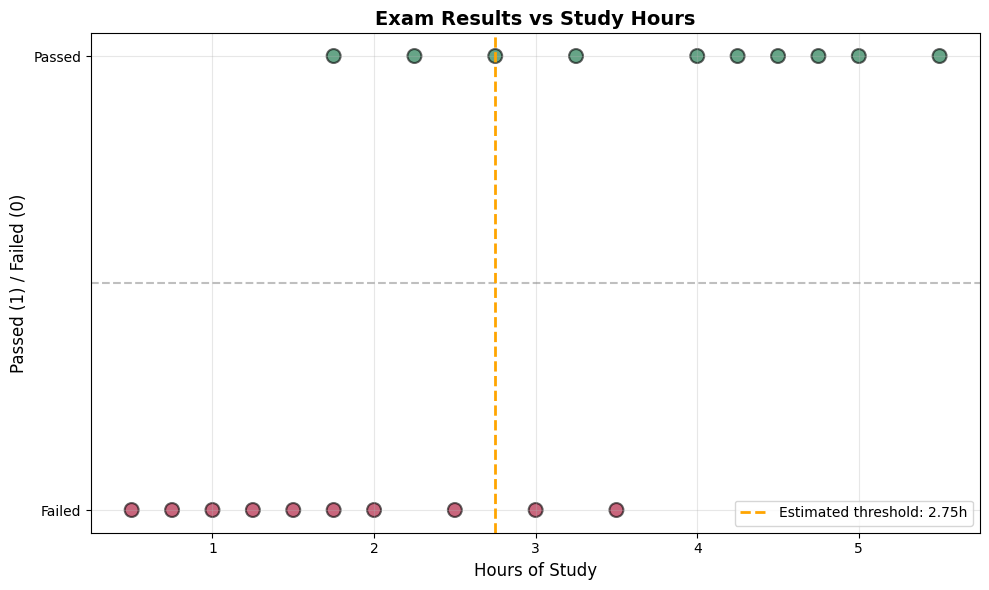

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(hours, passed, s=100, alpha=0.6, c=passed, cmap='RdYlGn', edgecolors='black', linewidth=1.5)
plt.xlabel('Hours of Study', fontsize=12)
plt.ylabel('Passed (1) / Failed (0)', fontsize=12)
plt.title('Exam Results vs Study Hours', fontsize=14, fontweight='bold')
plt.yticks([0, 1], ['Failed', 'Passed'])
plt.grid(True, alpha=0.3)
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)

threshold_estimate = 2.75
plt.axvline(x=threshold_estimate, color='orange', linestyle='--', linewidth=2, label=f'Estimated threshold: {threshold_estimate}h')
plt.legend()

plt.tight_layout()
plt.show()

We define the logit function as the linear combination of independent variables. In simple regression case we have only one variable x:

$$logit(p) = ln(\frac{p}{1-p}) = \beta_0 + \beta_1\cdot x,$$
so the estimated odds value is equal to:
$$\frac{p}{1-p} = e^{\beta_0 + \beta_1\cdot x}.$$

The estimation of $\beta$ coefficient is being done with the maximum likelihood estimation method (https://online.stat.psu.edu/stat415/lesson/1/1.2).

**Task** Use Logistic Regression from scikit learn to obtain the regression coefficients in our problem.

In [12]:
model = LogisticRegression()
model.fit(hours, passed)

beta_0 = model.intercept_[0]
beta_1 = model.coef_[0][0]

print("Regression coefficients:")
print(f"β₀ (intercept) = {beta_0:.4f}")
print(f"β₁ (coefficient for hours) = {beta_1:.4f}")
print(f"\nEquation: logit(p) = {beta_0:.4f} + {beta_1:.4f} * hours")


Regression coefficients:
β₀ (intercept) = -3.1400
β₁ (coefficient for hours) = 1.1488

Equation: logit(p) = -3.1400 + 1.1488 * hours


**Question** Having the coefficients how can we determine what is the probability that student who studied for 4.25h will pass the test?

**Task** Write the body of function which calculates this probability having the $\beta_0$ and $\beta_1$ coefficients and the study time (x). Using this function and coefficients obtained with previous task find the answer for previous question (the probability of passing the test after 4.25 hours of studying). <br/>
_Tip: np.exp() function can be useful_

In [13]:
def calculate_probability(beta_0, beta_1, x):

    logit_value = beta_0 + beta_1 * x
    # p = 1 / (1 + exp(-logit))
    probability = 1 / (1 + np.exp(-logit_value))
    
    return probability

if 'model' not in locals():
    model = LogisticRegression()
    model.fit(hours, passed)
    beta_0 = model.intercept_[0]
    beta_1 = model.coef_[0][0]

prob_4_25 = calculate_probability(beta_0, beta_1, 4.25)
print(f"Probability of passing after 4.25 hours of study: {prob_4_25:.4f} ({prob_4_25*100:.2f}%)")

Probability of passing after 4.25 hours of study: 0.8510 (85.10%)


**Task** Let's visualize the probability function - p(studying hours), to your previous scatter add a line showing the relation between studying time and the probability of passing. Can you see something interesting about this function? Do you know how this type of function is called?

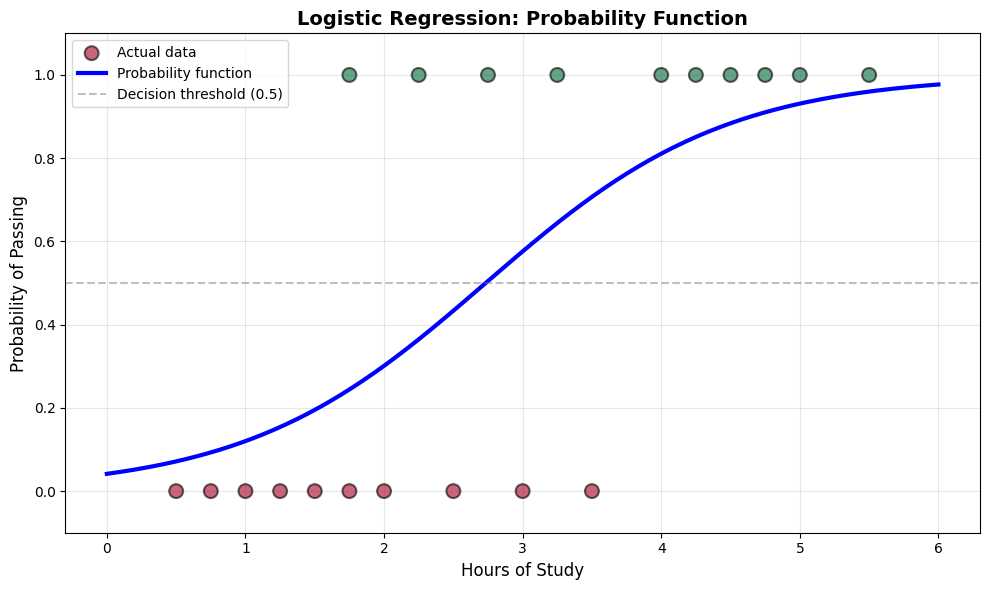

This curve has an S-shape and it's called a sigmoid function


In [16]:
hours_range = np.linspace(0, 6, 300).reshape(-1, 1)

probabilities = model.predict_proba(hours_range)[:, 1]

plt.figure(figsize=(10, 6))

plt.scatter(hours, passed, s=100, alpha=0.6, c=passed, cmap='RdYlGn', 
            edgecolors='black', linewidth=1.5, label='Actual data', zorder=3)

# Probability curve
plt.plot(hours_range, probabilities, 'b-', linewidth=3, label='Probability function', zorder=2)

plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='Decision threshold (0.5)')

plt.xlabel('Hours of Study', fontsize=12)
plt.ylabel('Probability of Passing', fontsize=12)
plt.title('Logistic Regression: Probability Function', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim([-0.1, 1.1])

plt.tight_layout()
plt.show()

print("This curve has an S-shape and it's called a sigmoid function")


Let's check if the probability which we calculated is the same as this returned with out fit logistic regression model from scikit learn. Use predict_proba function to find the probability of studying 4.25h. <br/>
_Tip: predict_proba requires 2D array or list of lists as input, so [[4.25]] should be passed_

In [18]:
prob_from_model = model.predict_proba([[4.25]])

print("Probabilities for 4.25 hours of study:")
print(f"Probability of failing (class 0): {prob_from_model[0][0]:.4f} ({prob_from_model[0][0]*100:.2f}%)")
print(f"Probability of passing (class 1): {prob_from_model[0][1]:.4f} ({prob_from_model[0][1]*100:.2f}%)")

prob_from_function = calculate_probability(beta_0, beta_1, 4.25)

print("\nComparison:")
print(f"From predict_proba: {prob_from_model[0][1]:.6f}")
print(f"From calculate_probability: {prob_from_function:.6f}")
print(f"Difference: {abs(prob_from_model[0][1] - prob_from_function):.10f}")

Probabilities for 4.25 hours of study:
Probability of failing (class 0): 0.1490 (14.90%)
Probability of passing (class 1): 0.8510 (85.10%)

Comparison:
From predict_proba: 0.850992
From calculate_probability: 0.850992
Difference: 0.0000000000


We may also not want to obtain the probabilities, but just the more probable class (whether student will pass or not). To obtain this class use the predict function on the model:

In [21]:
predicted_class = model.predict([[4.25]])

print("For a student who studied 4.25 hours:")
print(f"Predicted class: {predicted_class[0]} ({'Pass' if predicted_class[0] == 1 else 'Fail'})")
print(f"Probability of passing: {model.predict_proba([[4.25]])[0][1]:.4f}")

predictions = model.predict(hours)
print("\nPredictions for every student:")
for i, (h, actual, pred) in enumerate(zip(hours.flatten(), passed, predictions)):
    print(f"Student {i+1}: {h:.2f}h - Actual: {actual}, Predicted: {pred} {'✓' if actual == pred else '✗'}")

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(passed, predictions)
print(f"\nTraining accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")


For a student who studied 4.25 hours:
Predicted class: 1 (Pass)
Probability of passing: 0.8510

Predictions for every student:
Student 1: 0.50h - Actual: 0, Predicted: 0 ✓
Student 2: 0.75h - Actual: 0, Predicted: 0 ✓
Student 3: 1.00h - Actual: 0, Predicted: 0 ✓
Student 4: 1.25h - Actual: 0, Predicted: 0 ✓
Student 5: 1.50h - Actual: 0, Predicted: 0 ✓
Student 6: 1.75h - Actual: 0, Predicted: 0 ✓
Student 7: 1.75h - Actual: 1, Predicted: 0 ✗
Student 8: 2.00h - Actual: 0, Predicted: 0 ✓
Student 9: 2.25h - Actual: 1, Predicted: 0 ✗
Student 10: 2.50h - Actual: 0, Predicted: 0 ✓
Student 11: 2.75h - Actual: 1, Predicted: 1 ✓
Student 12: 3.00h - Actual: 0, Predicted: 1 ✗
Student 13: 3.25h - Actual: 1, Predicted: 1 ✓
Student 14: 3.50h - Actual: 0, Predicted: 1 ✗
Student 15: 4.00h - Actual: 1, Predicted: 1 ✓
Student 16: 4.25h - Actual: 1, Predicted: 1 ✓
Student 17: 4.50h - Actual: 1, Predicted: 1 ✓
Student 18: 4.75h - Actual: 1, Predicted: 1 ✓
Student 19: 5.00h - Actual: 1, Predicted: 1 ✓
Student 

## 3. Multiple logistic regression

More typical real-world use case is the multiple logistic regression, where the value of some binary class depends on more than one factor. In this part we will work on the dataset containing data about whether given person is diabetic or not.

Let's start with reading the data from "diabetes_scaled.csv" file. The data have already been scaled.

In [22]:
data = pd.read_csv("diabetes_scaled.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


Firstly, we add the intercept column (value equal to 1 for all rows), just for easier futher analysis.

In [23]:
data['intercept'] = 1

cols = ['intercept'] + [col for col in data.columns if col != 'intercept']
data = data[cols]

data.head()

,intercept,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,1,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,1,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,1,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


Next, we divide our data into train and test. Let's just leave last 100 cases in the test set, the remaining ones will be the training examples.

In [25]:
n_total = len(data)
n_test = 100
n_train = n_total - n_test

train_data = data.iloc[:n_train]
test_data = data.iloc[n_train:]

print(f"Total observations: {n_total}")
print(f"Training set size: {n_train}")
print(f"Test set size: {n_test}")

print(f"\nColumns in the dataset: {list(data.columns)}")

feature_cols = [col for col in data.columns if col != 'intercept']
target_col = feature_cols[-1]

print(f"Assumed target column: {target_col}")

# Split into features and labels
X_train = train_data.drop(columns=[target_col])
y_train = train_data[target_col]
X_test = test_data.drop(columns=[target_col])
y_test = test_data[target_col]

print("\nShapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")


Total observations: 768
Training set size: 668
Test set size: 100

Columns in the dataset: ['intercept', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class']
Assumed target column: Class

Shapes:
X_train: (668, 9)
y_train: (668,)
X_test: (100, 9)
y_test: (100,)


Use the scikit learn implementation of the logistic regression to build the model on the training set. What are the obtained regression coefficients?

In [27]:
X_train_no_intercept = X_train.drop(columns=['intercept'])
X_test_no_intercept = X_test.drop(columns=['intercept'])

diabetes_model = LogisticRegression(max_iter=1000, random_state=42)
diabetes_model.fit(X_train_no_intercept, y_train)

coefficients = diabetes_model.coef_[0]
intercept = diabetes_model.intercept_[0]

print("Regression coefficients:")
print(f"Intercept (β₀): {intercept:.6f}")
print("\nFeature coefficients:")
for feature, coef in zip(X_train_no_intercept.columns, coefficients):
    print(f"  {feature}: {coef:.6f}")

Regression coefficients:
Intercept (β₀): -0.870882

Feature coefficients:
  Pregnancies: 0.449965
  Glucose: 1.033245
  BloodPressure: -0.255728
  SkinThickness: 0.024991
  Insulin: -0.100875
  BMI: 0.758547
  DiabetesPedigreeFunction: 0.343601
  Age: 0.132237


Now, evaluate your model on the test examples. Classify the test examples, find the probabilitiy of diabetes disease for each test case and the overall accuracy score.

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = diabetes_model.predict(X_test_no_intercept)

# Probabilities for each test example
y_proba = diabetes_model.predict_proba(X_test_no_intercept)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Model evaluation on the test set:")

print(f"\nAccuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Detailed classification report
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))

print("\nDiabetes probabilities for all 100 test cases:")
for i in range(len(y_test)):
    prob_no_diabetes = y_proba[i][0]
    prob_diabetes = y_proba[i][1]
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    print(f"Case {i+1:03d}: P(diabetes) = {prob_diabetes:.4f} | P(no diabetes) = {prob_no_diabetes:.4f} | "
          f"Actual: {actual} | Predicted: {predicted} {'✓' if actual == predicted else '✗'}")


Model evaluation on the test set:

Accuracy: 0.8000 (80.00%)

Classification report:
              precision    recall  f1-score   support

 No Diabetes       0.80      0.90      0.85        63
    Diabetes       0.79      0.62      0.70        37

    accuracy                           0.80       100
   macro avg       0.80      0.76      0.77       100
weighted avg       0.80      0.80      0.79       100


Diabetes probabilities for all 100 test cases:
Case 001: P(diabetes) = 0.2702 | P(no diabetes) = 0.7298 | Actual: 0 | Predicted: 0 ✓
Case 002: P(diabetes) = 0.6167 | P(no diabetes) = 0.3833 | Actual: 0 | Predicted: 1 ✗
Case 003: P(diabetes) = 0.7835 | P(no diabetes) = 0.2165 | Actual: 0 | Predicted: 1 ✗
Case 004: P(diabetes) = 0.0795 | P(no diabetes) = 0.9205 | Actual: 0 | Predicted: 0 ✓
Case 005: P(diabetes) = 0.1282 | P(no diabetes) = 0.8718 | Actual: 0 | Predicted: 0 ✓
Case 006: P(diabetes) = 0.7844 | P(no diabetes) = 0.2156 | Actual: 0 | Predicted: 1 ✗
Case 007: P(diabetes) = 